In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
rs=42

## Regresion lineal simple

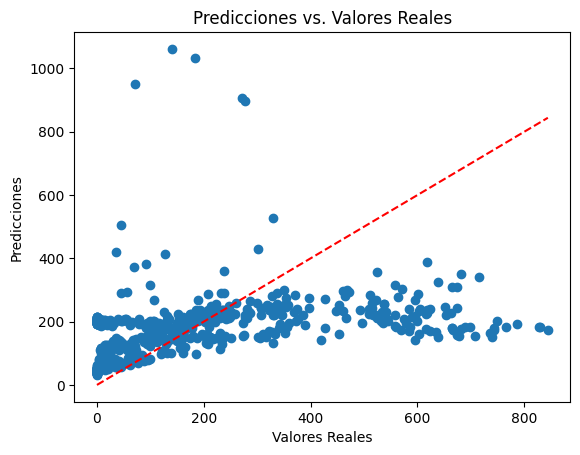

Intercept: 144330.0395712985
Coefficients: [-7.13507149e+01 -3.59209758e+00  5.63216815e-01  6.19118072e-03
  7.16503267e-05]
R^2: 0.08003945483092689
MAE: 136.7175318779767
MSE: 39238.11555960883
RMSE: 198.08613166905155


In [3]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

df['date'] = pd.to_datetime(df['date'])

# Crear nuevas columnas 'year', 'month' y 'day'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Selección de características y variable objetivo
X = df[['year', 'month', 'day', 'new_confirmed', 'vaccine_doses_administered_for_day']]
y = df['new_deceased']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## Regresion lineal simple (observando el dia anterior)

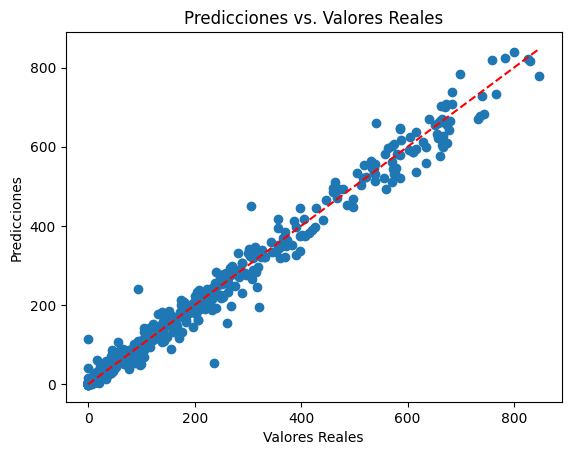

Intercept: 0.7241634978696823
Coefficients: [ 1.72031335e-03 -3.16320058e-05  9.87629076e-01 -1.56018100e-03
  1.44934951e-05  8.98668567e-01  2.61779217e+00]
                                    Feature  Coefficient
0                             new_confirmed     0.001720
1        vaccine_doses_administered_for_day    -0.000032
2                        new_deceased_lag_1     0.987629
3                       new_confirmed_lag_1    -0.001560
4  vaccine_doses_administered_for_day_lag_1     0.000014
5                           country_code_CO     0.898669
6                           country_code_PE     2.617792
R^2: 0.9834313045966785
MAE: 16.700529624636616
MSE: 718.2376492665899
RMSE: 26.79995614299751


In [4]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 1  # Número de días para mirar hacia atrás
for i in range(1, X_days + 1):
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
    df[f'vaccine_doses_administered_for_day_lag_{i}'] = df.groupby('country_code')['vaccine_doses_administered_for_day'].shift(i)

# Eliminar filas con valores NaN (debido al desplazamiento)
df = df.dropna()

# Codificar la columna 'country_code'
df = pd.get_dummies(df, columns=['country_code'], drop_first=True)

# Selección de características y variable objetivo
feature_cols = [col for col in df.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased']]
X = df[feature_cols]
y = df['new_deceased']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## Regresion lineal simple (observando los 3 dias anteriores)

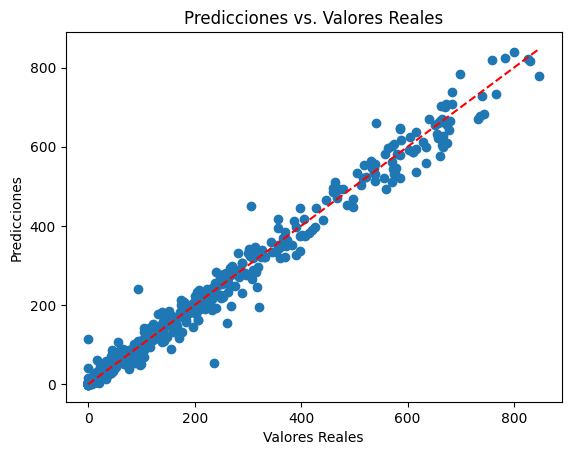

Intercept: 0.7241634978696823
Coefficients: [ 1.72031335e-03 -3.16320058e-05  9.87629076e-01 -1.56018100e-03
  1.44934951e-05  8.98668567e-01  2.61779217e+00]
                                    Feature  Coefficient
0                             new_confirmed     0.001720
1        vaccine_doses_administered_for_day    -0.000032
2                        new_deceased_lag_1     0.987629
3                       new_confirmed_lag_1    -0.001560
4  vaccine_doses_administered_for_day_lag_1     0.000014
5                           country_code_CO     0.898669
6                           country_code_PE     2.617792
R^2: 0.9834313045966785
MAE: 16.700529624636616
MSE: 718.2376492665899
RMSE: 26.79995614299751


In [5]:
# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 1  # Número de días para mirar hacia atrás
for i in range(1, X_days + 1):
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
    df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
    df[f'vaccine_doses_administered_for_day_lag_{i}'] = df.groupby('country_code')['vaccine_doses_administered_for_day'].shift(i)

# Eliminar filas con valores NaN (debido al desplazamiento)
df = df.dropna()

# Codificar la columna 'country_code'
df = pd.get_dummies(df, columns=['country_code'], drop_first=True)

# Selección de características y variable objetivo
feature_cols = [col for col in df.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased']]
X = df[feature_cols]
y = df['new_deceased']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

## valor óptimo de X_days que minimiza el error del modelo

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)
        df[f'new_confirmed_lag_{i}'] = df.groupby('country_code')['new_confirmed'].shift(i)
        df[f'vaccine_doses_administered_for_day_lag_{i}'] = df.groupby('country_code')['vaccine_doses_administered_for_day'].shift(i)
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    # Codificar la columna 'country_code'
    df_temp = pd.get_dummies(df_temp, columns=['country_code'], drop_first=True)
    
    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased']]
    X = df_temp[feature_cols]
    y = df_temp['new_deceased']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2        MAE         MSE       RMSE
0        1  0.983431  16.700530  718.237649  26.799956
1        2  0.985284  15.475510  638.684574  25.272210
2        3  0.986262  15.146922  583.453317  24.154778
3        4  0.988533  14.764167  510.839455  22.601758
4        5  0.988908  13.860422  459.189819  21.428715
5        6  0.988737  14.397422  500.788137  22.378296
6        7  0.990636  13.562581  387.731576  19.690901
7        8  0.989730  13.687273  433.145265  20.812142
8        9  0.988430  14.274306  500.418836  22.370043
9       10  0.988866  13.907219  422.652817  20.558522
10      11  0.989021  13.160869  419.640244  20.485123
11      12  0.990191  13.310583  430.136221  20.739726
12      13  0.989403  13.820595  452.620767  21.274886
13      14  0.990094  14.099867  424.945432  20.614205
14      15  0.990062  13.181564  403.234378  20.080697
15      16  0.989925  13.250663  407.008324  20.174447
16      17  0.989364  13.522537  450.660241  21.228760
17      18

## valor óptimo de X_days que minimiza el error del modelo (solo con nuevos confirmados)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    # Codificar la columna 'country_code'
    df_temp = pd.get_dummies(df_temp, columns=['country_code'], drop_first=True)
    
    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased']]
    X = df_temp[feature_cols]
    y = df_temp['new_deceased']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2        MAE         MSE       RMSE
0        1  0.983445  16.597098  717.647768  26.788949
1        2  0.984404  15.919737  676.910571  26.017505
2        3  0.985654  15.818307  609.247631  24.682942
3        4  0.988477  15.018376  513.361475  22.657482
4        5  0.988109  14.231216  492.289857  22.187606
5        6  0.988517  14.665325  510.587159  22.596176
6        7  0.989341  14.349335  441.325184  21.007741
7        8  0.989073  13.895192  460.833431  21.467031
8        9  0.988439  14.358999  500.027673  22.361299
9       10  0.988330  14.403197  443.000623  21.047580
10      11  0.989277  13.147906  409.869810  20.245242
11      12  0.988964  13.751674  483.912802  21.998018
12      13  0.989170  13.674783  462.572075  21.507489
13      14  0.989307  14.350625  458.736958  21.418146
14      15  0.989782  13.421869  414.596379  20.361640
15      16  0.989860  13.249370  409.654056  20.239912
16      17  0.988875  13.657637  471.353070  21.710667
17      18

## valor óptimo de X_days que minimiza el error del modelo (solo con nuevos confirmados) + dia de la semana

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    
    # Codificar la columna 'country_code' y 'day_of_week'
    df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)
    


    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased']]
    X = df_temp[feature_cols]
    y = df_temp['new_deceased']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2        MAE         MSE       RMSE
0        1  0.983670  16.802990  707.872012  26.605864
1        2  0.984456  16.127151  674.647981  25.973987
2        3  0.985876  15.711798  599.857893  24.491997
3        4  0.988554  15.086674  509.902815  22.581028
4        5  0.988232  14.312280  487.213934  22.072923
5        6  0.988817  14.577483  497.242624  22.298938
6        7  0.989643  14.234046  428.832189  20.708264
7        8  0.989188  13.921989  455.976212  21.353600
8        9  0.988618  14.275348  492.272839  22.187222
9       10  0.988445  14.404612  438.622385  20.943314
10      11  0.989467  13.059985  402.597517  20.064833
11      12  0.989124  13.620305  476.933282  21.838802
12      13  0.989120  13.817024  464.709898  21.557131
13      14  0.989228  14.470477  462.120373  21.496985
14      15  0.989773  13.490057  414.986211  20.371210
15      16  0.989859  13.235816  409.692287  20.240857
16      17  0.988835  13.667246  473.062852  21.750008
17      18

## 8 dias anteriores + dia de la semana

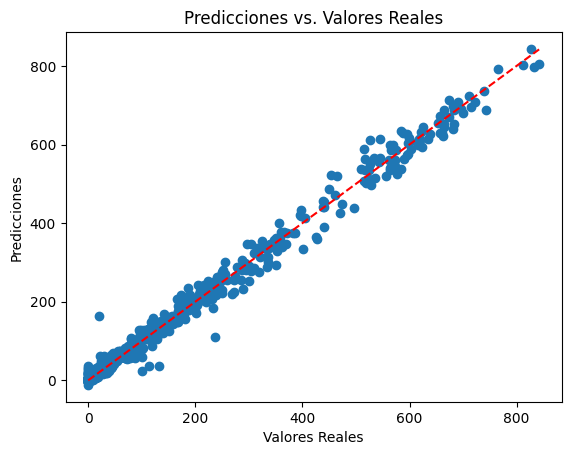

Intercept: -0.007252480867293798
Coefficients: [ 3.33283237e-04 -1.93431439e-05  4.77145022e-01  2.38656510e-01
  1.62517344e-01  1.30993648e-01  4.89177027e-02 -5.73926575e-02
  2.43459581e-01 -2.57046095e-01  1.96309291e+00  4.50596786e+00
  5.12391195e-01 -4.54231194e+00 -3.76486581e+00  2.31696088e+00
 -7.90262532e-01  7.23195123e-02]
                               Feature  Coefficient
0                        new_confirmed     0.000333
1   vaccine_doses_administered_for_day    -0.000019
2                   new_deceased_lag_1     0.477145
3                   new_deceased_lag_2     0.238657
4                   new_deceased_lag_3     0.162517
5                   new_deceased_lag_4     0.130994
6                   new_deceased_lag_5     0.048918
7                   new_deceased_lag_6    -0.057393
8                   new_deceased_lag_7     0.243460
9                   new_deceased_lag_8    -0.257046
10                     country_code_CO     1.963093
11                     country_code

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 8  # Número de días para mirar hacia atrás
# Crear características basadas en los últimos X días
for i in range(1, X_days + 1):
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)



# Eliminar filas con valores NaN (debido al desplazamiento)
df_temp = df.dropna()


# Codificar la columna 'country_code' y 'day_of_week'
df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)



# Selección de características y variable objetivo
feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased']]
X = df_temp[feature_cols]
y = df_temp['new_deceased']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
    
# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

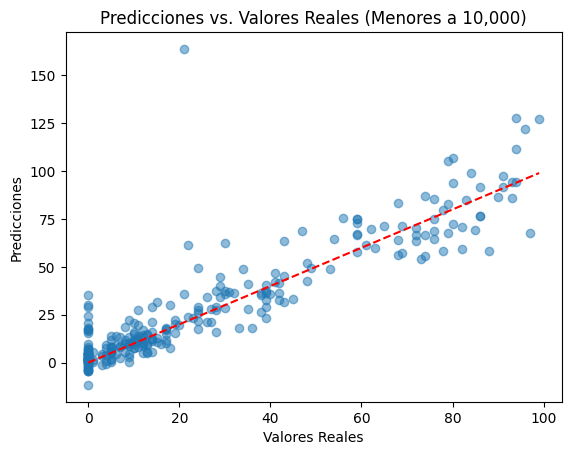

In [10]:
# Filtrar los datos para valores reales menores a 10,000
filter_condition = y_test < 100
y_test_filtered = y_test[filter_condition]
y_pred_filtered = y_pred[filter_condition]

# Visualizar predicciones vs. valores reales
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Menores a 10,000)')
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], color='red', linestyle='--')
plt.show()


## modelo solo con los X dias anteriores (no incluye el dia actual)

In [11]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Definir el rango de X_days a probar
x_days_range = range(1, 31)  # De 1 a 30 días

# Inicializar listas para almacenar los resultados
results = []

# Bucle para probar diferentes valores de X_days
for X_days in x_days_range:
    # Crear características basadas en los últimos X días
    for i in range(1, X_days + 1):
        df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)

    
    
    # Eliminar filas con valores NaN (debido al desplazamiento)
    df_temp = df.dropna()
    
    
    # Codificar la columna 'country_code' y 'day_of_week'
    df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)
    


    # Selección de características y variable objetivo
    feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased', 'new_confirmed', 'vaccine_doses_administered_for_day']]
    X = df_temp[feature_cols]
    y = df_temp['new_deceased']
    
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Calcular métricas de evaluación
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Almacenar los resultados
    results.append({
        'X_days': X_days,
        'R^2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convertir los resultados a un DataFrame para su visualización
results_df = pd.DataFrame(results)
print(results_df)

# Encontrar el mejor valor de X_days basado en la métrica deseada
best_result = results_df.loc[results_df['RMSE'].idxmin()]  # Puedes cambiar 'RMSE' por la métrica que prefieras
print(f"Mejor valor de X_days: {best_result['X_days']}")


    X_days       R^2        MAE         MSE       RMSE
0        1  0.983312  16.848741  723.423414  26.896532
1        2  0.983771  16.512901  704.363992  26.539857
2        3  0.985339  15.868899  622.646619  24.952888
3        4  0.988246  15.286149  523.613824  22.882610
4        5  0.987648  14.610509  511.386220  22.613850
5        6  0.988758  14.687422  499.858124  22.357507
6        7  0.989730  14.213241  425.210135  20.620624
7        8  0.988616  14.216113  480.099051  21.911163
8        9  0.988330  14.453936  504.749374  22.466628
9       10  0.988181  14.539895  448.663220  21.181672
10      11  0.989283  13.269422  409.637450  20.239502
11      12  0.988824  13.951130  490.088082  22.137933
12      13  0.988933  14.037758  472.702304  21.741718
13      14  0.989095  14.554315  467.821083  21.629172
14      15  0.989561  13.638949  423.565956  20.580718
15      16  0.989692  13.393442  416.447261  20.407040
16      17  0.988482  13.998911  488.013837  22.091035
17      18

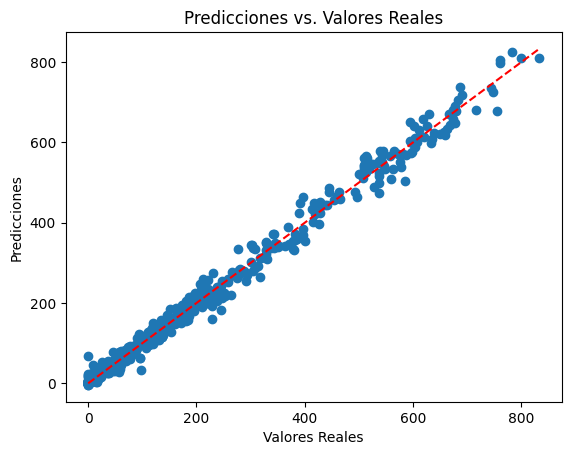

Intercept: 2.6814097594380257
Coefficients: [ 3.95621892e-01  2.21695496e-01  1.56775856e-01  1.54812088e-01
  1.16176289e-01  2.71585887e-02  2.74841620e-01 -9.74180288e-03
 -4.29038373e-02 -4.23194668e-02 -7.26309752e-02 -7.77277759e-02
 -3.35626222e-02  1.77759992e-01 -1.71222387e-01 -1.12935592e-01
 -1.09865053e-02 -6.33168564e-02 -2.73371436e-03 -3.44114141e-02
  1.58838827e-01 -3.93801502e-02  2.17506277e-02  4.60779964e-01
  3.06706037e-01 -3.84162967e-01 -3.35052145e+00 -3.62963788e+00
  9.02007154e-01 -2.37542720e+00 -8.48016953e-02]
                  Feature  Coefficient
0      new_deceased_lag_1     0.395622
1      new_deceased_lag_2     0.221695
2      new_deceased_lag_3     0.156776
3      new_deceased_lag_4     0.154812
4      new_deceased_lag_5     0.116176
5      new_deceased_lag_6     0.027159
6      new_deceased_lag_7     0.274842
7      new_deceased_lag_8    -0.009742
8      new_deceased_lag_9    -0.042904
9     new_deceased_lag_10    -0.042319
10    new_deceased_lag

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga de dataset
df = pd.read_csv("../data/processed/data_paises.csv", usecols=range(7))

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el día de la semana y agregarlo como una nueva columna
df['day_of_week'] = df['date'].dt.day_name()

# Ordenar el DataFrame por país y fecha
df = df.sort_values(by=['country_code', 'date'])

# Crear características basadas en los últimos X días
X_days = 23  # Número de días para mirar hacia atrás
# Crear características basadas en los últimos X días
for i in range(1, X_days + 1):
    df[f'new_deceased_lag_{i}'] = df.groupby('country_code')['new_deceased'].shift(i)



# Eliminar filas con valores NaN (debido al desplazamiento)
df_temp = df.dropna()


# Codificar la columna 'country_code' y 'day_of_week'
df_temp = pd.get_dummies(df_temp, columns=['country_code', 'day_of_week'], drop_first=True)


# Selección de características y variable objetivo
feature_cols = [col for col in df_temp.columns if col not in ['location_key', 'date', 'country_name', 'new_deceased', 'new_confirmed', 'vaccine_doses_administered_for_day']]
X = df_temp[feature_cols]
y = df_temp['new_deceased']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
    
# Visualizar predicciones vs. valores reales
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar los coeficientes del modelo
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Crear un DataFrame con los nombres de las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coef_df)

# Mostrar las métricas de error
print(f'R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

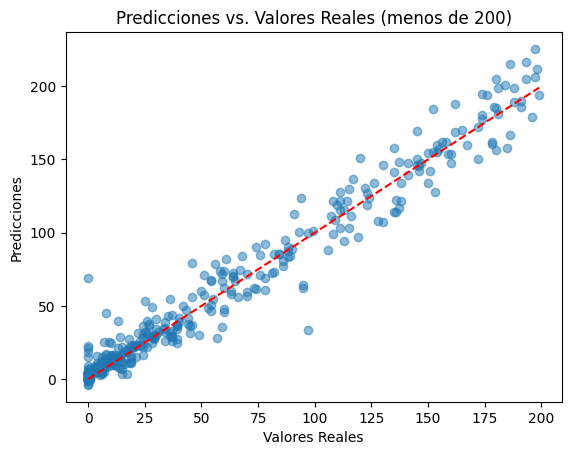

In [25]:
# Filtrar los datos para valores reales menores a 10,000
filter_condition = y_test < 200
y_test_filtered = y_test[filter_condition]
y_pred_filtered = y_pred[filter_condition]

# Visualizar predicciones vs. valores reales
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (menos de 200)')
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], color='red', linestyle='--')
plt.show()

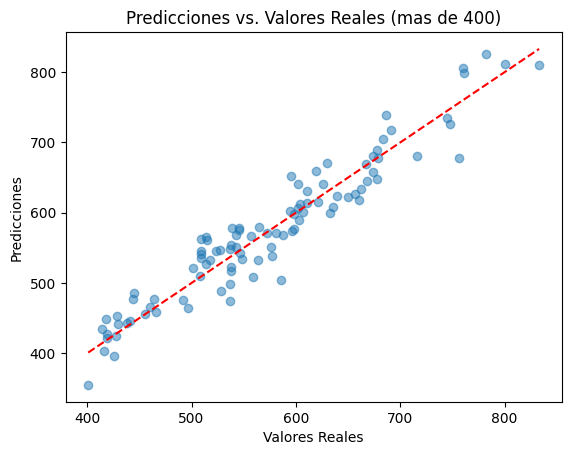

In [22]:
# Filtrar los datos para valores reales menores a 10,000
filter_condition = y_test > 400
y_test_filtered = y_test[filter_condition]
y_pred_filtered = y_pred[filter_condition]

# Visualizar predicciones vs. valores reales
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (mas de 400)')
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], color='red', linestyle='--')
plt.show()